# Zuber, viajes compatidos 


* [Introducción](#introduccion)
    * Objetivo del proyecto
* [Análisis exploratorio de datos](#analisis-exploratorio-de-datos)
    * [Importacion de datos](#importacion-de-datos)
    * [Estudio del contenido de los datos](#estudio-del-contenido-de-los-datos)
* [Analisis comparativo y visualizacion de datos](#analisis-comparativo-y-visualizacion-de-datos)
* [Prueba de hipótesis](#prueba-de-hipotesis)
    * [Planteamiento de la hipotesis](#planteamiento-de-la-hipotesis)
    * [Conclusion](#Conclusion)
* [Conclusiones generales](#conclusiones-generales)


## Introduccion

El objetivo del presente proyecto es identificar patrones en la información disponible para comprender mejor las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Analizaremos una base de datos con información detallada sobre los viajes en taxi de los competidores y probaremos una hipótesis específica sobre cómo el clima afecta la frecuencia de los viajes.

El objetivo principal es analizar los datos de viajes y el clima para identificar patrones significativos que puedan ayudar a Zuber a optimizar sus servicios. En particular, se busca comprender cómo diferentes condiciones climáticas afectan la duración y frecuencia de los viajes en taxi en Chicago. Este análisis permitirá a Zuber mejorar su planificación y servicio, ofreciendo una experiencia más eficiente y satisfactoria para sus usuarios.

## Analisis exploratorio de datos

### Importacion de datos

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, levene


In [2]:
trips_amount = pd.read_csv('project_sql_result_01.csv')
chicago = pd.read_csv('project_sql_result_04.csv')
hipotesis = pd.read_csv('project_sql_result_07.csv')


### Estudio del contenido de los datos 

In [3]:
display(trips_amount.head())
# nombre de la empresa de taxis 
#numero de viajes de cada compañia de taxis el 15 y 16 de noviembre de 2017 

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
trips_amount.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
print(trips_amount.duplicated().sum())

0


Este dataset contiene la columna company_name, que guarda el nombre de la empresa de taxis a analizar y la columna trips_amount donde se almacena el numero de viajes de cada realizados por cada compañia el 15 y 16 de noviembre de 2017. No se observan valores duplicados ni ausentes. De la funcion describe podemos desprender que el minimo de viajes realizados fueron 2 y el maximo 19,558, asi como que el promedio de viajes es de 2,145. 

In [7]:
display(chicago.head())
#barrios de chicago donde finalizaron los viajes 
#el promedio de viajes que terminaron en cada barrio en noviembre de 2017 

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
chicago.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
print(chicago.duplicated().sum())

0


El dataset Chicago contiene las columnas dropoff_location_name, con los nombres de los barrios donde finalizaron los viajes y average_trip, con el promedio de viajes que terminaron en este barrio para el periodo de noviembre 2017. No se observan valores nulos ni duplicados. De la funcion describe podemos observar que el maximo promedio de viajes terminados en alguno de los vecindarios mencionados de chicago fue de 10,727; el minimo de 1.8 y el promedio de viajes fue de 599.95

In [11]:
display(hipotesis.sample(10))

,start_ts,weather_conditions,duration_seconds
993,2017-11-04 16:00:00,Bad,2580.0
370,2017-11-11 09:00:00,Good,1200.0
278,2017-11-18 06:00:00,Good,1380.0
896,2017-11-18 05:00:00,Good,1656.0
481,2017-11-11 16:00:00,Good,2760.0
321,2017-11-04 06:00:00,Good,1496.0
636,2017-11-18 14:00:00,Good,3480.0
193,2017-11-25 05:00:00,Good,1487.0
106,2017-11-11 07:00:00,Good,1380.0
187,2017-11-25 04:00:00,Good,1384.0


In [12]:
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
hipotesis.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [14]:
print(hipotesis.duplicated().sum())

print(hipotesis.value_counts())

197
start_ts             weather_conditions  duration_seconds
2017-11-11 08:00:00  Good                1380.0              8
2017-11-11 06:00:00  Good                1260.0              8
                                         1380.0              7
2017-11-11 16:00:00  Good                2400.0              6
2017-11-11 08:00:00  Good                1200.0              6
                                                            ..
2017-11-11 04:00:00  Good                1380.0              1
                                         1477.0              1
                                         1491.0              1
                                         1620.0              1
2017-11-25 23:00:00  Good                1500.0              1
Name: count, Length: 871, dtype: int64


El dataset que contiene los datos que se utilizaran para la prueba de hipotesis, alberga las columnas starts_ts, con la fecha y hora del viaje; weather_conditions, columna que determina si las condiciones del clima fueron buenas o malas dicha fecha y hora y por ultimo la duracion en segundo del viaje que se realizo. No se observan valores numero. Si existen diversos valores duplicado; sin embargo, esto es cuerente ya que varios viajes pudieron ser realizado en la misma fecha y hora. De la funcion describe podemos observar que la maxima duracion en minutos de los viajes fue de 7440 y el minimo de 0; en promedio la duracion es de 2017. 

## Analisis comparativo y visualizacion de datos 

In [15]:
top_10_chicago =chicago.sort_values(by= 'average_trips', ascending=False).head(10)
print(top_10_chicago)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


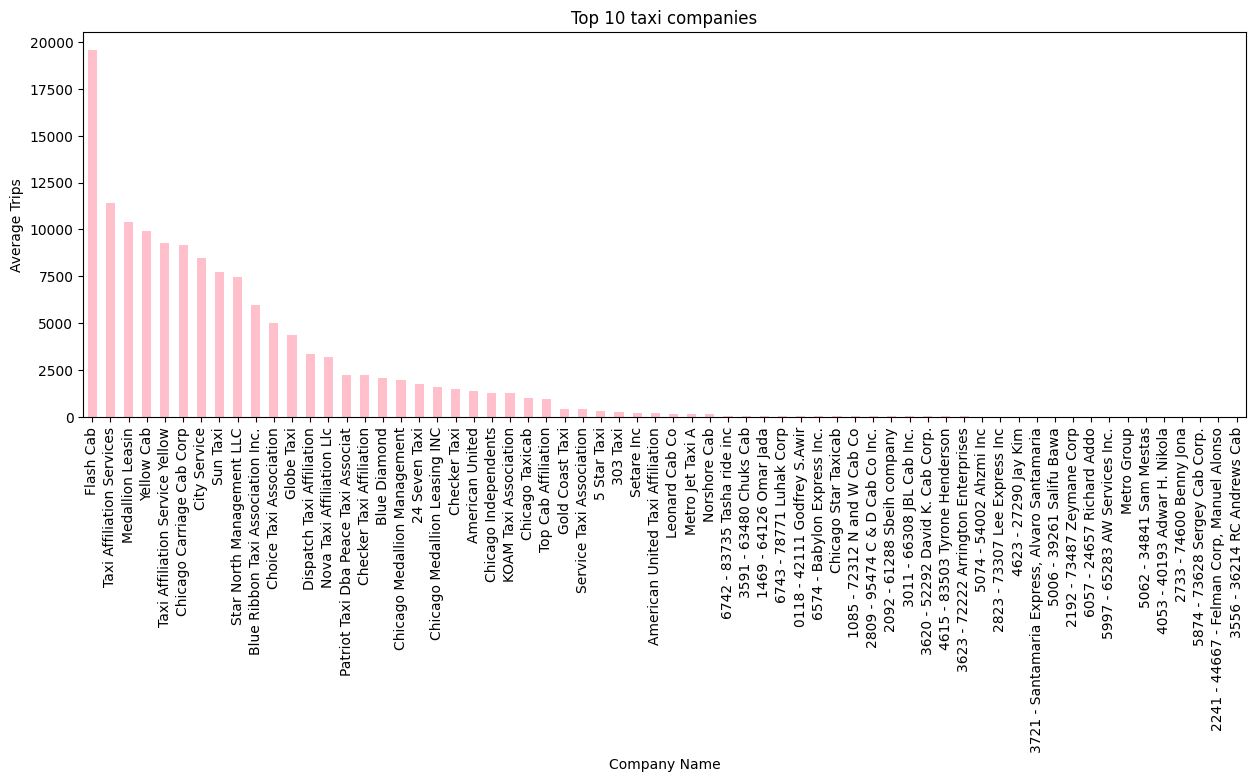

In [16]:
trips_amount.plot (figsize= (15,5),
                    kind = 'bar',
                   x= 'company_name', 
                   title= 'Top 10 taxi companies',
                   xlabel= 'Company Name',
                   ylabel= 'Average Trips',
                   color = 'pink', 
                   legend= False
                   )

plt.show()

In [17]:
trips_amount_10 =trips_amount.sort_values(by= 'trips_amount', ascending=False).head(10)
print(trips_amount_10)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


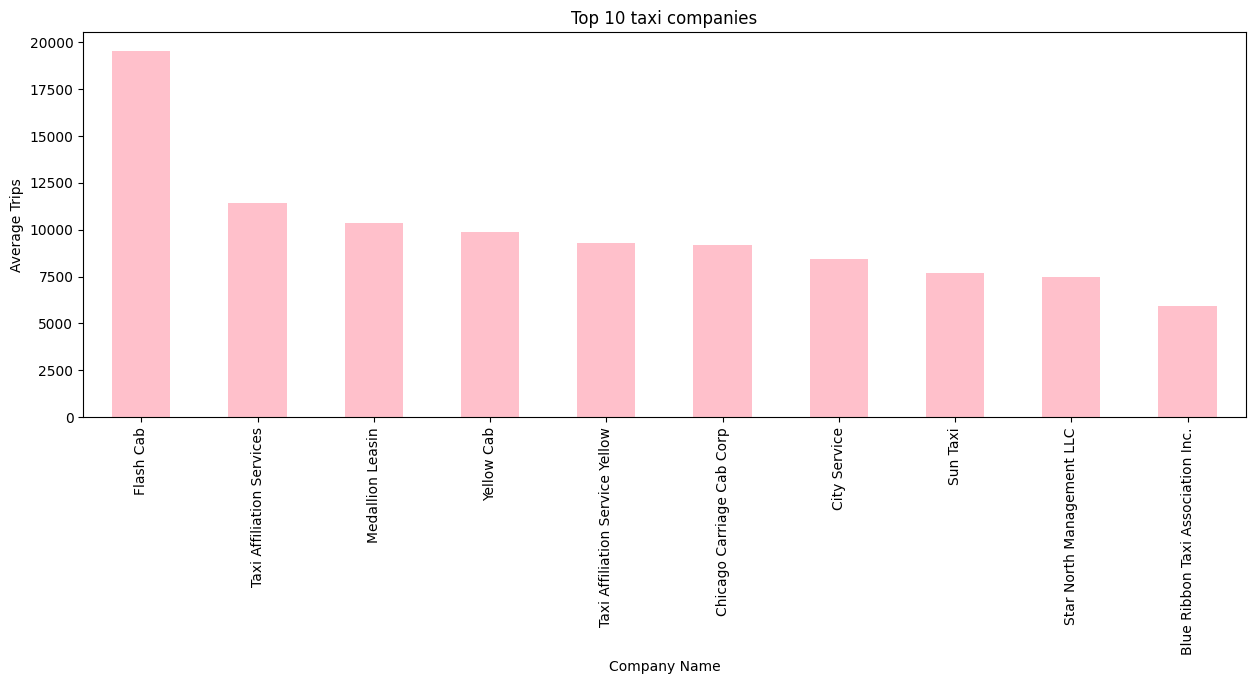

In [18]:
trips_amount_10.plot (figsize= (15,5),
                    kind = 'bar',
                   x= 'company_name', 
                   title= 'Top 10 taxi companies',
                   xlabel= 'Company Name',
                   ylabel= 'Average Trips',
                   color = 'pink', 
                   legend= False
                   )

plt.show()

De las graficas que antecede se observa que las empresas que mas viajes han realizado son Flash Cab, Taxi Aggiliation Services, Medallion Leasin, Yellow Cab y Taxi Aggiliation Service Yellow; por otro lado se observan 24 compañias que relizaron una cantidad minima de viajes tendiendo a los 0 viajes. Por lo tanto, podemos decir que al rededor de 20 empresas son las que acaparan los viajes; destacando por una gran diferencia Flash Cab. 

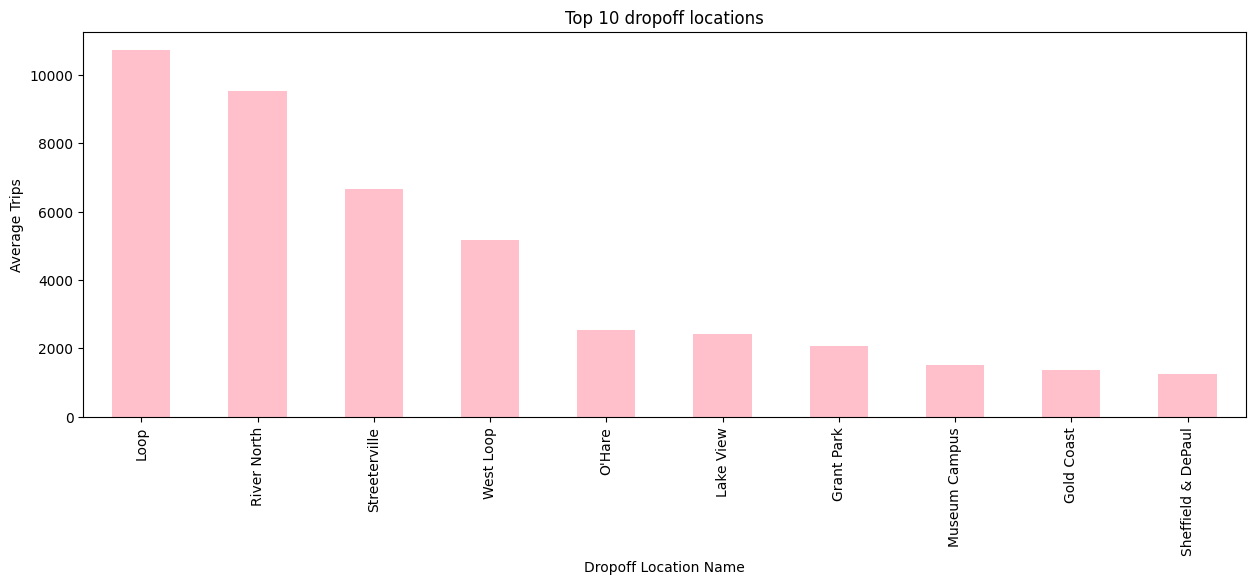

In [19]:
top_10_chicago.plot (figsize= (15,5),
                    kind = 'bar',
                    x= 'dropoff_location_name', 
                    title= 'Top 10 dropoff locations',
                    xlabel= 'Dropoff Location Name',
                    ylabel= 'Average Trips',
                    color = 'pink', 
                    legend= False)

plt.show()

En la grafica que antecede podemos observar los 10 vecidarios mas populares en donde terminan los viajes de taxi; podemos decir que estos vecindarios son populares y de los mas atractivos y dinamicos en Chicago. Por ejemplo Loop es el corazon financiero y cultural de la ciudad, por lo que muchos de estos viajes podrian ser de trabajo o turismo. River North es conocido por su vida noctura, restaurantes y entretenimiento. En general todos los vecindarios que se mencionan, tiene alguna atraccion turistica, de entretenimiento o bien centros laborales a los que mas gente podria estar interesada en acudir, lo cual eleva la cantidad de viajes hacia estos destinos.

## Prueba de hipotesis

In [20]:
hipotesis['start_ts'] = pd.to_datetime(hipotesis['start_ts'])
hipotesis['duration_seconds'] = hipotesis['duration_seconds'].astype(int)

In [21]:
saturday_rain = hipotesis[hipotesis['weather_conditions']== 'Bad']['duration_seconds']
saturday_norain = hipotesis[hipotesis['weather_conditions']== 'Good']['duration_seconds']

alpha = 0.5

### Planteamiento de la hipotesis 

*Hipotesis nula*: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos

*Hipotesis alternativa*: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

In [22]:
saturday_norain_mean = saturday_norain.mean()

saturday_norain_var = saturday_norain.std()

print(f"La media de la duracion de los viajes cuando no hay lluvia es de: {saturday_norain_mean}")

print(f"La desviacion estandar de la duracion de los viajes cuando no hay lluvia es de: {saturday_norain_var}")

La media de la duracion de los viajes cuando no hay lluvia es de: 1999.6756756756756
La desviacion estandar de la duracion de los viajes cuando no hay lluvia es de: 759.1982677071313


In [23]:
saturday_rain_mean = saturday_rain.mean()

saturday_rain_var = saturday_rain.std()

print(f"La media de la duracion de los viajes cuando hay lluvia es de: {saturday_rain_mean}")

print(f"La desviacion estandar de la duracion de los viajes cuando hay lluvia es de: {saturday_rain_var}")

La media de la duracion de los viajes cuando hay lluvia es de: 2427.2055555555557
La desviacion estandar de la duracion de los viajes cuando hay lluvia es de: 721.3141382244514


In [24]:


_, pvalue_levene2 = levene(saturday_rain, saturday_norain)
if pvalue_levene2 < alpha:
    print(f'p-value:{pvalue_levene2} - Rechazamos la hipotesis nula; las varianzas son iguales')
    equalvar2 = False
else:
    print(f'p-value:{pvalue_levene2} - No Rechazamos la hipotesis nula, las varianzas son diferentes')
    equalvar2 = True

p-value:0.5332038671974493 - No Rechazamos la hipotesis nula, las varianzas son diferentes


In [25]:
_, pvalue2 = ttest_ind(saturday_rain, saturday_norain, equal_var=equalvar2)

if pvalue2 < alpha:
    print(f'p-value:{pvalue2} - Rechazamos la hipotesis nula; la duracion promedio de los viajes no es igual')
else:
    print(f'p-value:{pvalue2} - No Rechazamos la hipotesis nula; las duracion promedio de los viajes es iguales')

p-value:6.517970327099473e-12 - Rechazamos la hipotesis nula; la duracion promedio de los viajes no es igual


### Conclusion

*Criterio Utilizado para Probar las Hipótesis*

- Prueba Estadística: Se utilizó una prueba t de dos muestras independientes para comparar las medias de la duración de los viajes en dos condiciones (sábados lluviosos y sabados no lluviosos).
- Razón para Usarla: La prueba t de dos muestras es apropiada cuando se quiere comparar las medias de dos grupos diferentes y determinar si hay una diferencia significativa entre ellas.

*Procedimiento:*

- Se realizo el cálculo de la media y la desviación estándar de las duraciones para ambos grupos.
- Realizamos la prueba t para determinar si las diferencias observadas en las medias son estadísticamente significativas.

*Elección de Hipótesis de Dos Colas*

- Se eligió una hipótesis de dos colas porque el interés no está en saber si la duración promedio es específicamente mayor o menor en los sábados lluviosos, sino en cualquier diferencia en la duración promedio de los viajes.

*Conclusion*

- Los resultados muestran que la duración promedio de los viajes es significativamente mayor en días lluviosos. Esto sugiere que la lluvia afecta negativamente el tiempo de viaje, posiblemente debido a condiciones de tráfico más lentas y mayores tiempos de espera.

# Conclusiones generales

**Objetivo:**

El objetivo principal de este proyecto era analizar los datos de viajes y clima para identificar patrones significativos que pudieran ayudar a Zuber a optimizar sus servicios. En particular, se buscaba comprender cómo diferentes condiciones climáticas afectan la duración y frecuencia de los viajes en taxi en Chicago.

**Análisis de datos:**

Se analizaron tres conjuntos de datos:

- Datos de viajes de la competencia: Este conjunto de datos contenía información sobre el número de viajes realizados por cada empresa de taxis en Chicago durante el 15 y 16 de noviembre de 2017. Se observó que un pequeño número de empresas acaparaba la mayoría de los viajes.

- Datos de destino de los viajes: Este conjunto de datos contenía información sobre los barrios más populares para los viajes en taxi en Chicago. Se observó que estos barrios son populares debido a su actividad comercial, turística o de entretenimiento.

- Datos de viajes y clima: Este conjunto de datos contenía información sobre la fecha, hora, condiciones climáticas y duración de los viajes en taxi en Chicago. Se observó que la duración promedio de los viajes es significativamente mayor en días lluviosos.

**Prueba de hipótesis:**

Se realizó una prueba t de dos muestras independientes para comparar la duración promedio de los viajes en sábados lluviosos y sábados no lluviosos. La prueba mostró que la diferencia en la duración promedio de los viajes es estadísticamente significativa, lo que sugiere que la lluvia afecta negativamente el tiempo de viaje.

Los resultados de este proyecto sugieren que Zuber podría optimizar sus servicios de la siguiente manera:

- Ajustar la oferta de vehículos en función del clima: Zuber podría aumentar la oferta de vehículos en días lluviosos para reducir los tiempos de espera y la duración de los viajes; especialmente en los barrios donde se detecta mas afluencia de usuarios.

- Ofrecer descuentos en días lluviosos: Zuber podría ofrecer descuentos en días lluviosos para incentivar a los usuarios a utilizar sus servicios.

- Comunicar a los usuarios los tiempos de espera estimados: Zuber podría comunicar a los usuarios los tiempos de espera estimados en función del clima y la hora del día; otorgandole a los usuarios un aproximado de duracion que los ayude a planificar su tiempo de viaje y horas de llegada. 